In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Importing all necessary libraries 

In [16]:
# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Time,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2,2,17:02:00,Fatal
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2,2,17:02:00,Fatal
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,2,2,17:02:00,Serious
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2,2,1:06:00,Fatal
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2,2,1:06:00,Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2,1,16:15:00,Fatal
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2,1,18:00:00,Fatal
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1,1,13:55:00,Serious
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2,1,13:55:00,Fatal


 
 Reading the data from the "cleand_dataset.csv" file.
 
 

In [3]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Time,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2,2,17:02:00,Fatal
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2,2,17:02:00,Fatal
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,2,2,17:02:00,Serious
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2,2,1:06:00,Fatal
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2,2,1:06:00,Fatal


Provides a peek into the DataFrame. The head() function shows the first few rows in the dataset provided.

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Sex_of_driver                12316 non-null  object
 2   Educational_level            12316 non-null  object
 3   Vehicle_driver_relation      12316 non-null  object
 4   Driving_experience           12316 non-null  object
 5   Lanes_or_Medians             12316 non-null  object
 6   Types_of_Junction            12316 non-null  object
 7   Road_surface_type            12316 non-null  object
 8   Light_conditions             12316 non-null  object
 9   Weather_conditions           12316 non-null  object
 10  Type_of_collision            12316 non-null  object
 11  Vehicle_movement             12316 non-null  object
 12  Pedestrian_movement          12316 non-null  object
 13  Cause_of_accident            12

To display the data type of each column and to count the non-null entries in the given dataset we used info() method.


In [13]:
# Basic Data Cleaning
# Remove rows where any of the following columns are missing
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['Number_of_vehicles_involved', 'Accident_severity', 'Weather_conditions'])
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Time,Accident_severity,Hour
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2,2,2024-04-23 17:02:00,Fatal,17
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2,2,2024-04-23 17:02:00,Fatal,17
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,2,2,2024-04-23 17:02:00,Serious,17
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2,2,2024-04-23 01:06:00,Fatal,1
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2,2,2024-04-23 01:06:00,Fatal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2,1,2024-04-23 16:15:00,Fatal,16
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2,1,2024-04-23 18:00:00,Fatal,18
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1,1,2024-04-23 13:55:00,Serious,13
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2,1,2024-04-23 13:55:00,Fatal,13


In [6]:
# Exploratory Data Analysis (EDA)
# Descriptive statistics for 'Number_of_vehicles_involved'
print(df['Number_of_vehicles_involved'].describe())

count    12313.00000
mean         2.04077
std          0.68881
min          1.00000
25%          2.00000
50%          2.00000
75%          2.00000
max          7.00000
Name: Number_of_vehicles_involved, dtype: float64


describe() is used for numeric columns to find count, mean, standard deviation, min, max, and quartile values for the given numerical column.

In [7]:

# T-Test: Compare 'Number_of_vehicles_involved' between two 'Accident_severity' groups
# We have compared two severity levels: 'Fatal' and 'Serious'
group1 = df[df['Accident_severity'] == 'Fatal']['Number_of_vehicles_involved']
group2 = df[df['Accident_severity'] == 'Serious']['Number_of_vehicles_involved']

if len(group1) > 1 and len(group2) > 1:
    t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
    print(f"T-Test: T-statistic = {t_stat}, P-value = {p_val}")
else:
    print("Not enough data points for a T-Test comparison.")



T-Test: T-statistic = 9.738058576065248, P-value = 2.503689789558747e-22


Here we have performed T-Test to analyse how the Accident Sverity is related for the number of vehicled involved in the accident by using ttest_ind.

In [8]:
# Chi-Square Test: Relationship between 'Weather_conditions' and 'Accident_severity'
contingency_table = pd.crosstab(df['Weather_conditions'], df['Accident_severity'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2 Stat = {chi2_stat}, P-value = {p_val}")


Chi-Square Test: Chi2 Stat = 41.66198252891352, P-value = 0.0004430700682616468


In this we have performed the Chi-squre Test to test the relation between "Weather conditions" and "Accident_Severity"

In [9]:
from scipy.stats import f_oneway

if 'Time' in df.columns and 'Accident_severity' in df.columns:
    # Converting 'Accident_severity' into numerical values for analysis
    severity_mapping = {'Fatal': 2, 'Serious': 1}
    df['Accident_severity_numerical'] = df['Accident_severity'].map(severity_mapping)

    # Droping rows where 'Time' or 'Accident_severity_numerical' is NaN after the mapping
    df = df.dropna(subset=['Time', 'Accident_severity_numerical'])

    # Grouping data by 'Time' and collect 'Accident_severity_numerical' values
    time_groups = df.groupby('Time')['Accident_severity_numerical'].apply(list)

    # Performing ANOVA only if there are at least two groups to compare
    if len(time_groups) >= 2:
        anova_result = f_oneway(*time_groups)

        print(f"ANOVA Result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")

        # Interpretation
        if anova_result.pvalue < 0.05:
            print("There is a statistically significant difference in accident severity across different times of the day.")
        else:
            print("There is no statistically significant difference in accident severity across different times of the day.")
    else:
        print("Not enough groups for ANOVA.")
else:
    print("The dataset does not contain the required 'Time' and/or 'Accident_severity' columns.")


ANOVA Result: F-statistic = 2.8916371110401466, P-value = 2.2111019820814385e-162
There is a statistically significant difference in accident severity across different times of the day.


In this code we compared accident severity with the Time of accident by using the ANOVA test.

In [10]:
import pandas as pd
from scipy.stats import pearsonr
# Function to convert time to numerical value (minutes past midnight)
def convert_time_to_numerical(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60.0

# Apply the conversion to the 'Time' column
df['Time_numerical'] = df['Time'].apply(convert_time_to_numerical)

# Compute the Pearson correlation coefficient between 'Time_numerical' and 'Number_of_vehicles_involved'
corr_coefficient, p_value = pearsonr(df['Time_numerical'], df['Number_of_vehicles_involved'])

print(f"Pearson Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between the time of day and the number of vehicles involved in accidents.")
else:
    print("There is no statistically significant correlation between the time of day and the number of vehicles involved in accidents.")


Pearson Correlation Coefficient: 0.02528669956453332, P-value: 0.005303282333252398
There is a statistically significant correlation between the time of day and the number of vehicles involved in accidents.


In this code we did pearson test to find the significant correlation between the time of dat and no. of vehicles invloved in accidents. 

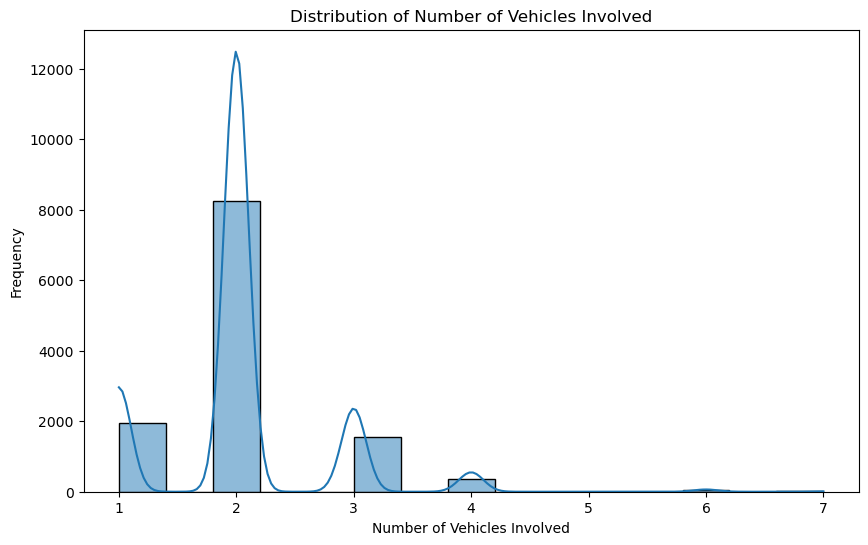

In [11]:
# Distribution of 'Number_of_vehicles_involved'
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_vehicles_involved'], kde=True)
plt.title('Distribution of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11404\3011946515.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


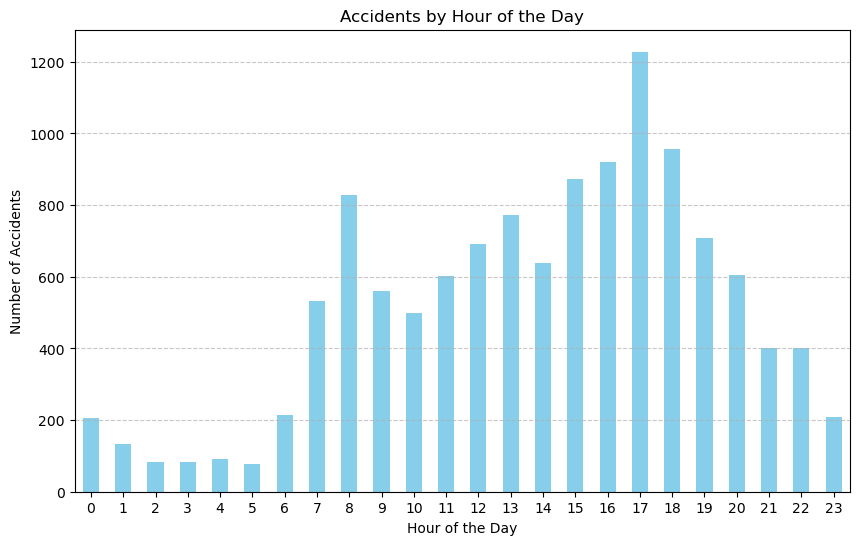

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Ensure 'Time' column is present
if 'Time' in df.columns:
    # Convert 'Time' to datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Extract hour from the 'Time' column
    df['Hour'] = df['Time'].dt.hour

    # Aggregate accidents by hour
    accidents_by_hour = df.groupby('Hour').size()

    # Plotting the accidents by hour
    plt.figure(figsize=(10, 6))
    accidents_by_hour.plot(kind='bar', color='skyblue')
    plt.title('Accidents by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The 'Time' column is missing in the dataset.")
